# Project 1

Vincent  
2024-04-14

# *Markov Chains*

## *Introduction*

Here is the system of equations that represents the scenario.

Here is the transition matrix. The market shares after 3 years are shown
below given that the initial market shares are equal, which meant that
the initial vector is \[1/3, 1/3, 1/3\].

## *Recommendation*

As seen in the below graphs, the effect of launching campaign 2 is
better than campaign 1. Note that campaign 0 shows what would happen if
no campiagn is launched. In that scenario, company C would have the
highest market share whereas we would be stuck in the middle. Launching
campaign 1 would not change this situation but we would be closer to C.
However, launching campaign 2 would allow us to surpass C and have the
highest market share, bringing us to 0.4.

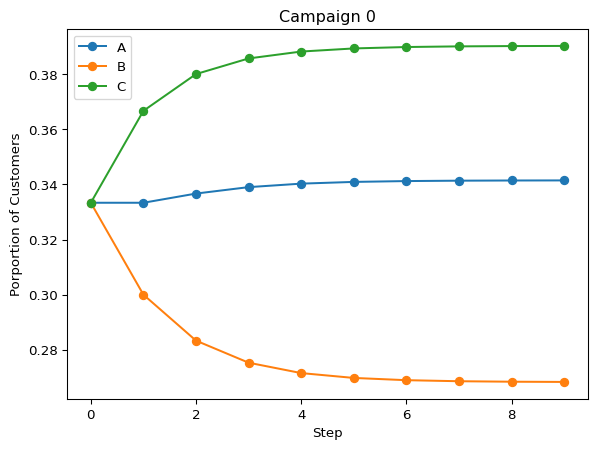

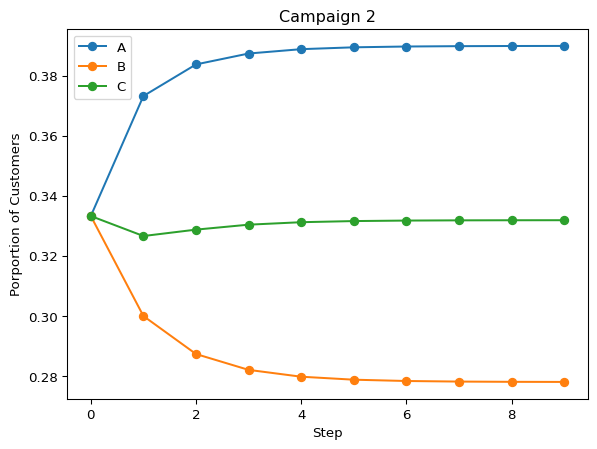

You might have noticed that we’re assuming that the market shares are
equal at the beginning. However, it is shown that the market shares
would be the same after a couple years regardless of the initial market
shares. An example is seen below where the initial market shares are
\[0, 0, 1\].

Further analysis shows that there is a diminishing marginal return if
more money is spent on a campaign to take more customers away from B or
C. The is shown as the curves are concave down. Additionally, these
graphs also show that spending money on taking C’s customers is more
valuable than taking B’s because A increases around 0.15 for the former
and 0.1 for the latter. Taking C’s customers also makes A the market
leader by a significant margin. It should be noted that this also
assumes the amount of money it takes to take B’s customers is the same
as taking C’s customers.

Additionally, although the initial market share doesn’t matter, it is
important to note that we’re assuming these events are independent of
each other. For example, perhaps customers are more likely to follow the
pack if a majority of the population are using companies which means
that the market would be more volatile than my simulations suggest. This
would also mean that it’s more important for us to have the highest
market share at the beginning, making initial market shares more
important.

This is excellent. You’ve found a good balance between what to show and
what to hide (in code), so that the reader can understand your point
without getting bogged down in details. But your code, when I look at
it, is well organized and sufficiently commented.

(Just FYI, one option, if you’d like to let the reader see your code if
they like, is to put this code in the yaml at the top of the document:

    format:
      html:
        code-fold: show
        code-tools: 
          source: true
          toggle: true

Then if you remove the “echo: false” from your code chunks, the code
will be hidden by default, but the reader can click to see it. I’ve done
this for one of your code chunks below, just so you can see what it
looks like.)

Regarding this project, the only thing that I might suggest would be to
discuss why these results had to happen, regardless of initial state
given the specific transition matrices you had? For instance, can you
look at the matrix you calculate after three years and tell from this
which company will do best?

Grade: E

# *Gas in a Tube*

Before I start, I want to preface this problem by saying that I wasn’t
too clear what the procedure that was listed meant. For example, it said
“One way to proceed is simply to use trial and error until you think
you’ve hit on a reasonable value of D that is, the one that gives the
best approximation to t = 180 from the t = 360 values” I wasn’t sure
where t came from. Anyway, I think my result is decent and I’ll try to
explain what I did.

The time dependent reaction diffusion equation is shown below and I
translated it to matrix form.

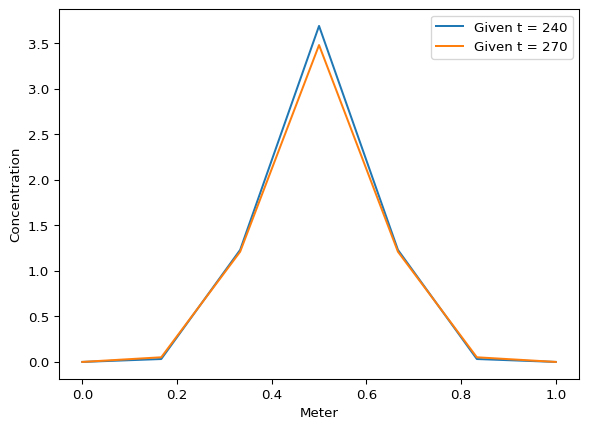

In [5]:
given1 = [0, 0.032, 1.23, 3.69, 1.23, 0.032, 0]
given2 = [0, 0.051, 1.21, 3.48, 1.21, 0.051, 0]

meter = np.arange(0, 7, 1)/6
meter

plt.plot(meter, given1, label='Given t = 240')
plt.plot(meter, given2, label='Given t = 270')
plt.legend()
plt.xlabel('Meter')
plt.ylabel('Concentration')
plt.show()

I identified the constants: N = 7, h = 1/6, and k = 1. After a
preliminary graph of the table, I thought it looked similar to a normal
distribution so I defined that as my function. The mean has to be 0.5 as
seen in the preliminary graph. This meant that my parameters that I can
tweak to get the best approximation are the standard deviation, D, and
the initial concentration.

Here is the code so far.

In [6]:
# constants and initial conditions
N = 7 # number of nodes
h = 1/6 # distance between nodes
k = 1 # time step
mean = 3/6


M = sp.zeros(N) # matrix M
for i in range(N):
    if (i>1):
        M[i-1,i] = 1
    if (i > 0) and (i < N-1):
        M[i,i] = -2
    if (i<N-2):
      M[i+1,i] = 1

# parameters
D = 0
std = 0
y_t0 = sp.Matrix([0, 0, 0, 0, 0, 0, 0]) # initial condition


def normal_distribution_function(x):
    s = std
    m = mean
    y = 1/(s*np.sqrt(2*np.pi))*(sp.exp(-1/2*((x-m)/s)**2))
    return y

def reaction_diffusion_equation(y):
    return k*D/h**2 * M * y + y + k * y.applyfunc(normal_distribution_function)

After this, I tweaked the parameters to get the best approximation. I
found that D = 0.000005, mean = 3/6, std = 1, and the initial
concentration of \[0, 0, 1.25, 4, 1.25, 0, 0\] gave me the best
approximation. The comparison between the approximation and the actual
values for t = 240 and t = 270 are shown below.

Text(0, 0.5, 'Concentration')

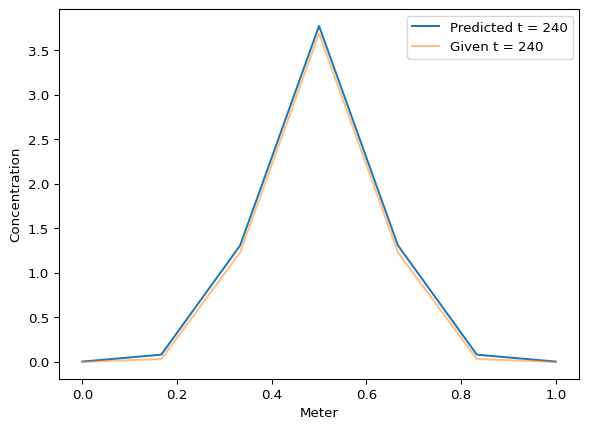

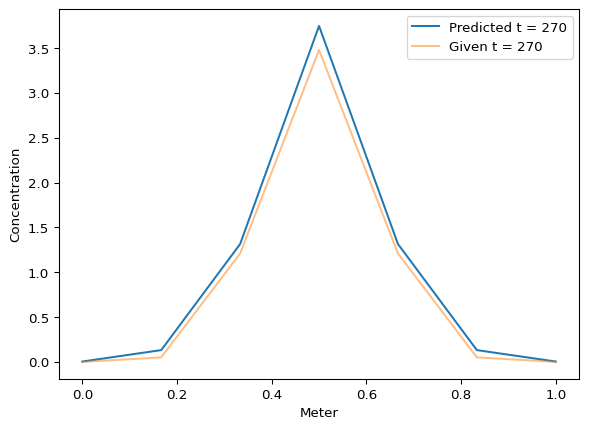

In [7]:
std = 0.1
D = 0.000005
y_t0 = sp.Matrix([0, 0, 1.25, 4, 1.25, 0, 0]) # initial condition

plt.figure()
t = 240
y_t = y_t0
for i in range(t):
    y_t = reaction_diffusion_equation(y_t)


yplot = [item[0] for item in y_t.tolist()]
plt.plot(meter, yplot, label = 'Predicted t = 240')
plt.plot(meter, given1, label='Given t = 240', alpha=0.5)
plt.legend()
plt.xlabel('Meter')
plt.ylabel('Concentration')

plt.figure()
t = 270
y_t = y_t0
for i in range(t):
    y_t = reaction_diffusion_equation(y_t)

yplot = [item[0] for item in y_t.tolist()]
plt.plot(meter, yplot, label = 'Predicted t = 270')

plt.plot(meter, given2, label='Given t = 270', alpha=0.5)
plt.legend()
plt.xlabel('Meter')
plt.ylabel('Concentration')

For t = 210, I got:

For t = 300, I got:

As we discussed, you didn’t need to use the normal distribution here.
I’d like to see you work this problem including the backwards time
method. There was a mistake in the original project description, which I
apologize for – the times should have been 240 and 270, not 180 and 360,
so you are trying to find the best D to approximate the values at t=240
and given the values at t=270.

I think it will just take a bit more work to get this right!

Grade: R

# *Sports Ranking*

## *Win Loss Ratio*

array([[0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0.],
       [1., 1., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 1., 0., 0., 0., 1., 1.],
       [1., 0., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0.]])

## *Vertex Power*

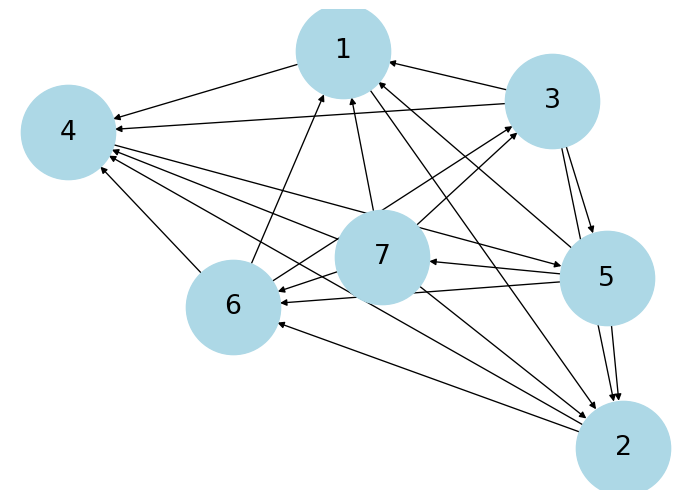

In [11]:
# directed graph 
G = nx.DiGraph() 
rows, columns = M.shape
for i in range(rows): 
 for j in range(columns): 
   if M[i][j] == 1: 
      G.add_edge(i+1,j+1) 
nx.draw(G, with_labels=True, node_size = 5000, node_color = 'lightblue', font_size = 20, font_color = 'black')

Msquared = np.dot(M,M)

vertex_power_matrix = Msquared + M
vertex_power = np.sum(vertex_power_matrix, axis=1)
df = pd.DataFrame({'Team': team, 'Vertex Power': vertex_power}).sort_values(by='Vertex Power', ascending=False).set_index('Team')
df

## *Reverse Page Rank*

Note that I used alpha = 0.85 and the teleportation vector is \[1/7,
1/7, 1/7, 1/7, 1/7, 1/7, 1/7\].

In [12]:
# reverse graph

T = M.transpose()
D = np.identity(7)
for i in range(7):
    D[i,i] = 1/(np.sum(T[i],axis = 0))

# transition matrix
P = np.dot(T.transpose(),D)


# teleportation vector
v = np.array([1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7])
a = 0.85

lhs = (np.identity(7) - a * P)
rhs = (1-a) * v

x = np.linalg.solve(lhs, rhs)
df = pd.DataFrame({'Team': team, 'Page Rank': x}).sort_values(by='Page Rank', ascending=False).set_index('Team')
df

## *Weighted Vertex Power*

Note I couldn’t figure out how to rename the nodes to 1-7 instead of
0-6.

array([[ 0.,  4.,  0., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  0., 18.,  0.],
       [15.,  7.,  0., 13.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3.,  0.,  0.],
       [ 7., 10.,  0.,  0.,  0., 18.,  7.],
       [23.,  0., 13., 13.,  0.,  0.,  0.],
       [45.,  6.,  8., 14.,  0., 19.,  0.]])

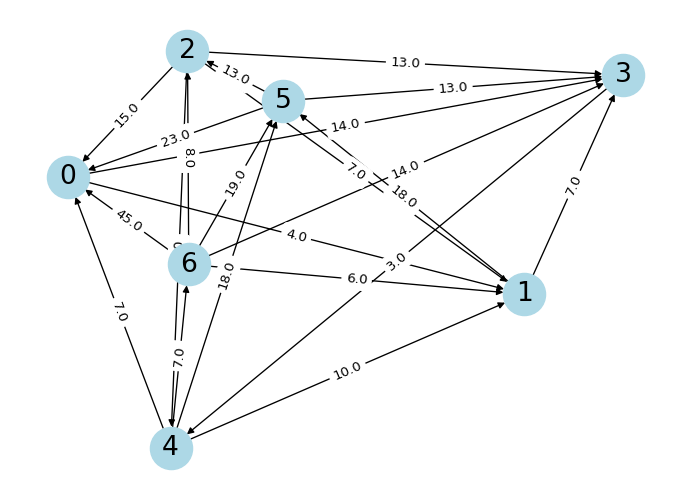

In [13]:
# weighted adjacency matrix
M = np.zeros((7,7))
M[0,1] = 4
M[6,2] = 8
M[1,3] = 7
M[3,4] = 3
M[2,1] = 7
M[4,0] = 7
M[5,0] = 23
M[2,0] = 15
M[6,1] = 6
M[1,5] = 18
M[2,3] = 13
M[6,3] = 14
M[4,6] = 7
M[5,3] = 13
M[2,4] = 7
M[4,5] = 18
M[6,0] = 45
M[4,1] = 10
M[6,5] = 19
M[0,3] = 14
M[5,2] = 13

display(M)

G = nx.from_numpy_array(np.matrix(M), create_using=nx.DiGraph)


layout = nx.spring_layout(G)

nx.draw(G, layout, with_labels=True, node_size = 1000, node_color = 'lightblue', font_size = 20, font_color = 'black')
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)
plt.show()

Msquared = np.dot(M,M)

vertex_power_matrix = Msquared + M
vertex_power = np.sum(vertex_power_matrix, axis=1)
df = pd.DataFrame({'Team': team, 'Vertex Power': vertex_power}).sort_values(by='Vertex Power', ascending=False).set_index('Team')
df

This is a good start. Your code seems good – but I’d like to also see
some writing: describing the problem, explanation about what is
happening mathematically in these different cases, and why your code
matches what these formulas say. Then, it would be good to see a brief
discussion of why the different rankings give different results, and
which one you think is the most accurate.

Grade: R